In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('/content/Churn_Modelling (1).csv')

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
print(df.shape)

(10000, 14)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [31]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [32]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [35]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [36]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [41]:
X_train.shape

(8000, 11)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [67]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8637 - loss: 0.3340 - val_accuracy: 0.8531 - val_loss: 0.3494
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8531 - loss: 0.3548 - val_accuracy: 0.8469 - val_loss: 0.3490
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8599 - loss: 0.3430 - val_accuracy: 0.8469 - val_loss: 0.3512
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8653 - loss: 0.3253 - val_accuracy: 0.8519 - val_loss: 0.3499
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8581 - loss: 0.3460 - val_accuracy: 0.8506 - val_loss: 0.3495
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.3441 - val_accuracy: 0.8481 - val_loss: 0.3502
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8610 - loss: 0.3364 - val_accuracy: 0.8494 - val_loss: 0.3501
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8607 - loss: 0.3397 - val_acc

In [75]:
model.layers[2].get_weights()

[array([[-0.21432033],
        [-1.0675551 ],
        [ 1.7460933 ],
        [-1.1522112 ],
        [-0.5031613 ],
        [ 1.244777  ],
        [ 0.56595445],
        [ 0.7881336 ],
        [ 1.2229862 ],
        [-0.7795735 ],
        [-0.16737755]], dtype=float32),
 array([-0.3832645], dtype=float32)]

In [76]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [78]:
y_pred = np.where(y_log > 0.5, 1.0, 0.0)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

In [80]:
import matplotlib.pyplot as plt

In [81]:
history.history

{'accuracy': [0.8600000143051147,
  0.8587499856948853,
  0.8609374761581421,
  0.8603125214576721,
  0.860156238079071,
  0.8604687452316284,
  0.8600000143051147,
  0.8618749976158142,
  0.8629687428474426,
  0.8607812523841858,
  0.8621875047683716,
  0.8621875047683716,
  0.8623437285423279,
  0.8618749976158142,
  0.8637499809265137,
  0.8623437285423279,
  0.862500011920929,
  0.8635937571525574,
  0.8634374737739563,
  0.8645312786102295,
  0.8631250262260437,
  0.8610937595367432,
  0.8654687404632568,
  0.8637499809265137,
  0.8634374737739563,
  0.8656250238418579,
  0.862500011920929,
  0.8654687404632568,
  0.8659374713897705,
  0.8667187690734863,
  0.8648437261581421,
  0.8665624856948853,
  0.8654687404632568,
  0.8660937547683716,
  0.8654687404632568,
  0.8660937547683716,
  0.8667187690734863,
  0.8648437261581421,
  0.8643749952316284,
  0.8657812476158142,
  0.8665624856948853,
  0.8667187690734863,
  0.8657812476158142,
  0.8668749928474426,
  0.8665624856948853,
 

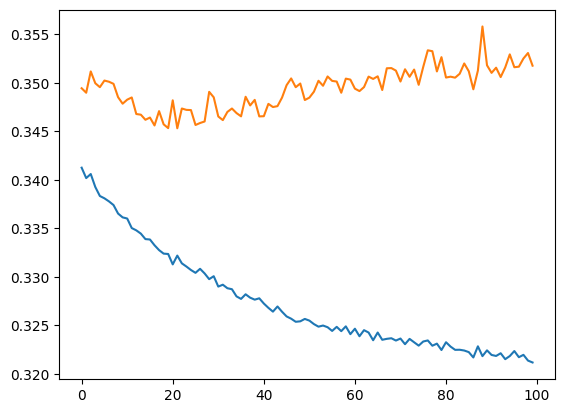

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



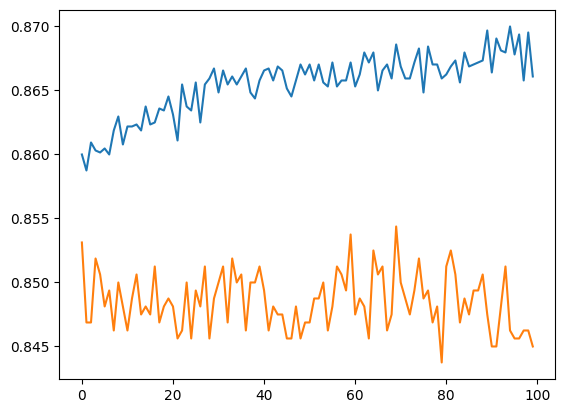

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])